# РК-1
### Технологии Машинного Обучения

Трифонов Дмитрий Алексеевич, ИУ5-65Б, Вариант 18

Задача 3, датасет 2

## Задание
Для заданного набора данных произведите:
- масштабирование данных (для одного признака)
- преобразование категориальных признаков в количественные для одного признака способами:
  - label encoding
  - one hot encoding

Какие методы Вы использовали для решения задачи и почему?

Для студентов группы ИУ5-65Б, ИУ5И-65Б - для набора данных построить "парные диаграммы".

# Решение

### Загрузка датасета

Для работы с набором данных буду использовать библиотеку `pandas`, так как это наиболее распространённый и простой в использовании инструмент для решения поставленной задачи. 

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
data = pd.DataFrame(data = wine.data, columns = wine.feature_names)

### Первичный анализ

In [2]:
print('Всего строк: {}'.format(data.shape[0]))
print('Всего колонок: {}'.format(data.shape[1]))

Всего строк: 178
Всего колонок: 13


In [3]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Масштабирование данных
Для масштабирования выберу показатель `color_intensity` (интенсивность цвета). Это потребуется мне для следующего задания.

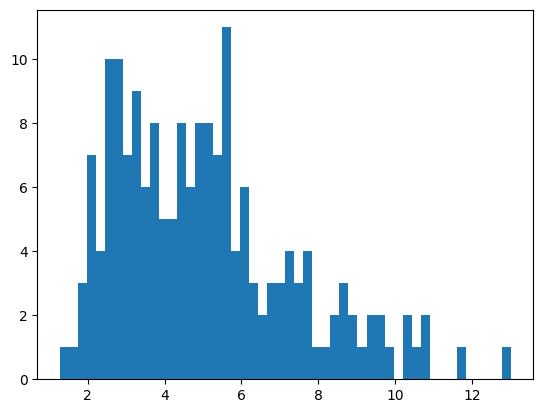

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(data['color_intensity'], 50)
plt.show()

Для масштабирования выберу метод Z-оценки. С помощью такого масштабирования удобно рассматривать, сколько стандартных отклонений составляет разброс значений выбранного показателя относительного среднего значения.

С помощью Z-оценки я смогу далее удобно создать новый категориальный признак, основанный на числовых значениях `color_intensity`

Для масштабирования буду использовать инструмент библиотеки `sklearn` - `StandardScaler`.

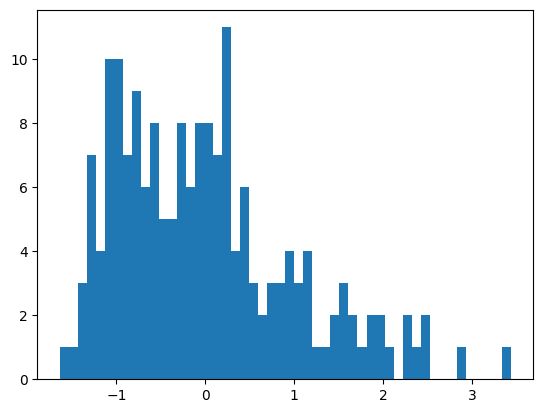

In [6]:
from sklearn.preprocessing import StandardScaler

z_sc = StandardScaler()
z_sc_data = z_sc.fit_transform(data[['color_intensity']])

plt.hist(z_sc_data, 50)
plt.show()

По графику можно заметить, что большинство значений меньше среднего для показателя

### Добавление нового категориального признака

Так как категориальных признаков в моём датасете нет, мне нужно создать один новый.

Один из показателей, который можно категоризировать - это `color_intensity`, или же интенсивность цвета. Разделю по этому показателю вина на блеклые, яркие и средней яркости.

Для этого мне поможет прежде сделанное масштабирование данных для `color_intensity`. По сделанному масштабированию, разные виды вина я могу распределить по цветам следующим образом:
- Цвет яркий, если промасштабированное значение `color_intensity` больше `0.5`
- Цвет блеклый, если промасштабированное значение `color_intensity` меньше `-0.5`
- Для остальных случаев цвет вина буду считать средним.

In [7]:
cat_list = []
for i in z_sc_data:
    if i < -0.5:
        cat_list.append('faded')
    elif i > 0.5:
        cat_list.append('bright')
    else:
        cat_list.append('average')
data['color_category'] = cat_list

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,color_category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,average
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,average
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,average
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,bright
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,average


### Преобразование категориального признака в количественный

In [8]:
cat_enc = data['color_category']
cat_enc

0      average
1      average
2      average
3       bright
4      average
        ...   
173     bright
174     bright
175     bright
176     bright
177     bright
Name: color_category, Length: 178, dtype: object

##### Label encoding
Так как я работаю только с одним признаком, логично будет использовать инструмент `LabelEncoder` из библиотеки `sklearn`

In [9]:
cat_enc.unique()

array(['average', 'bright', 'faded'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc)

In [11]:
le.classes_

array(['average', 'bright', 'faded'], dtype=object)

In [12]:
cat_enc_le

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [13]:
import numpy as np

np.unique(cat_enc_le)

array([0, 1, 2])

In [14]:
le.inverse_transform([0, 1, 2])

array(['average', 'bright', 'faded'], dtype=object)

##### One-hot encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['color_category']])

In [16]:
cat_enc_ohe.shape

(178, 3)

In [17]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]])

In [18]:
cat_enc.head()

0    average
1    average
2    average
3     bright
4    average
Name: color_category, dtype: object

### Парные диаграммы

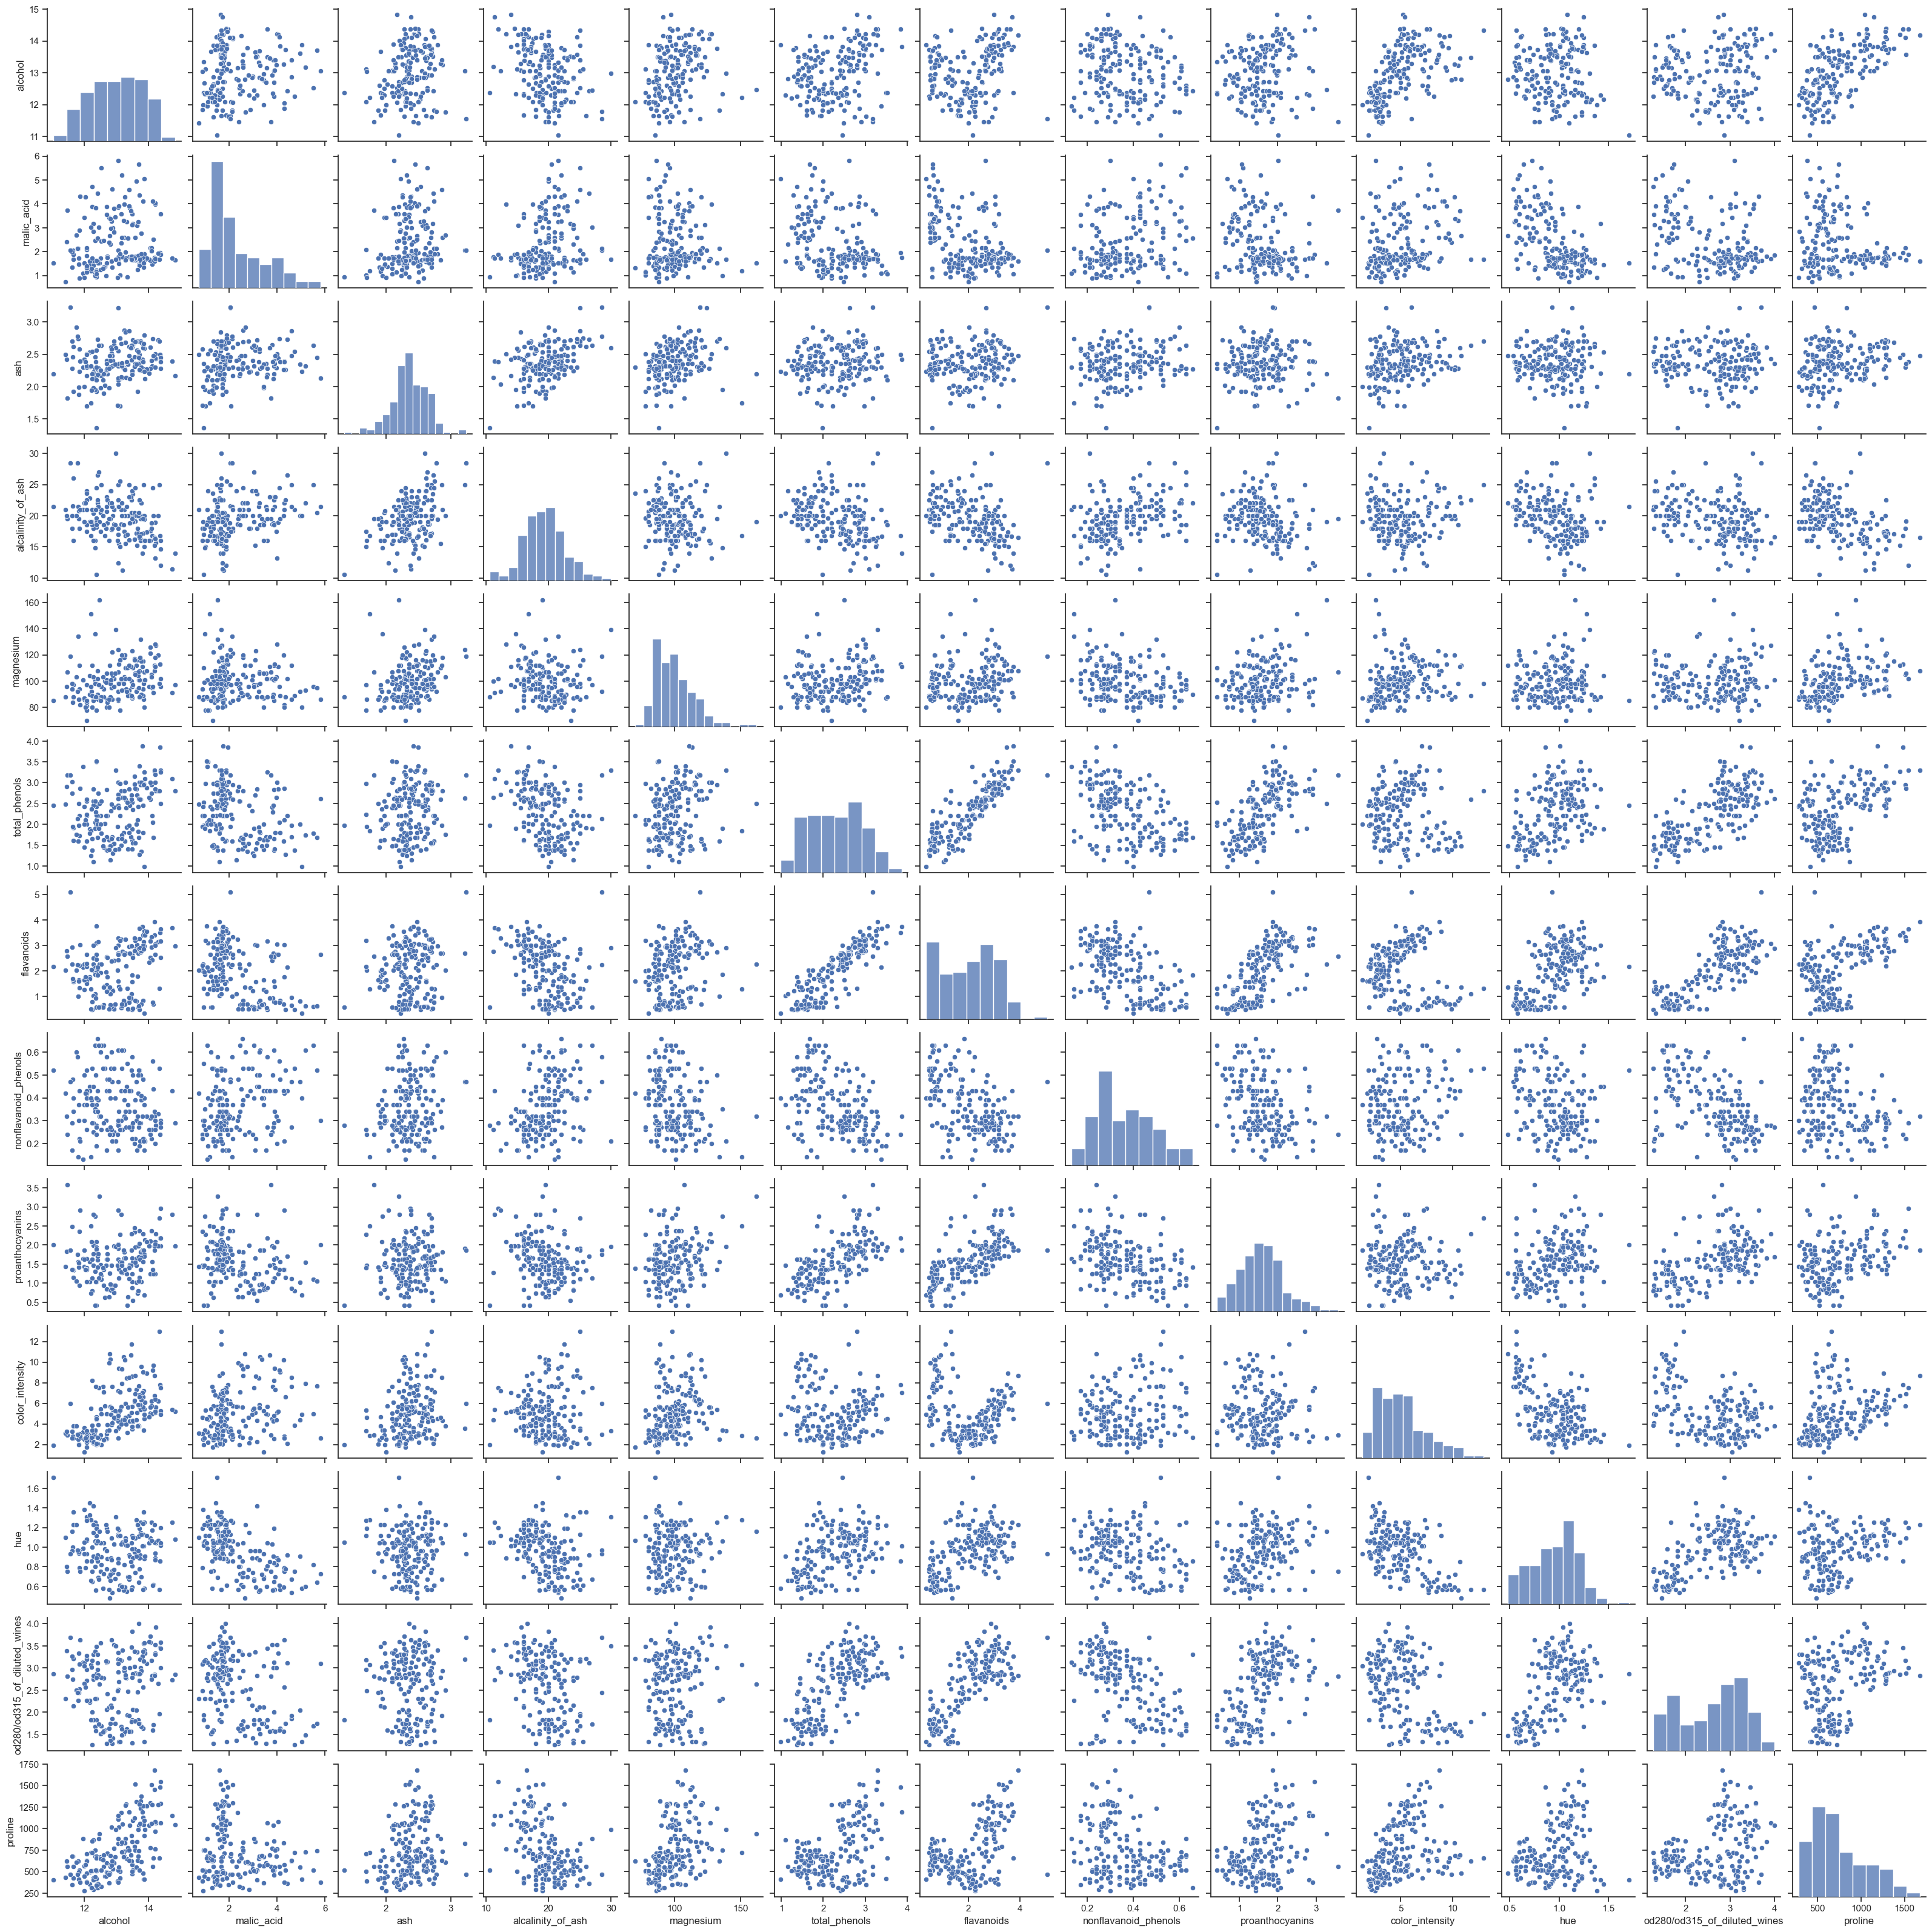

In [20]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(data)